# Iris Dataset analysis
### It contains dataset about species of flowers

In [18]:
# importing important package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our goal is to classify flowers in differnt catagory
### Download data from https://www.kaggle.com/uciml/iris

In [19]:
# Loading dataset
try:
    iris = pd.read_csv('iris.csv')
except Exception as e:
    print("Can't load dataset... try again")

In [20]:
# getting propery of dataset
iris.shape

(150, 6)

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## We do not need feature Id, because it will not affect our dependent variable

In [22]:
iris = iris.drop(['Id'],axis=1)

In [23]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Now we have 4 Independent variable and one dependent feature(Species)
## All the sepal and petal lengths are in centimeter

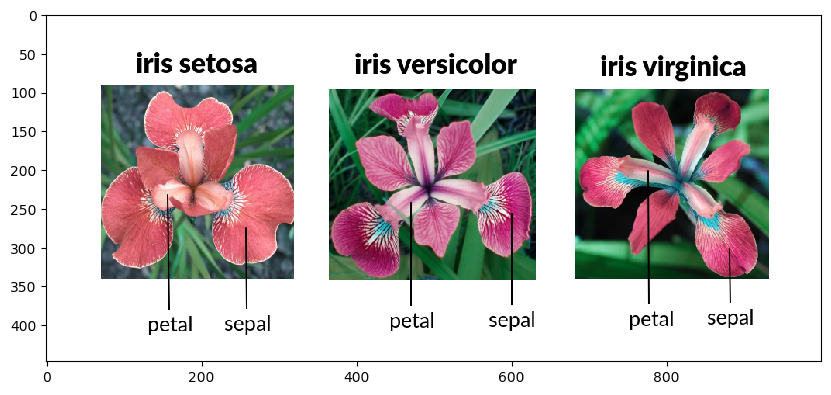

In [31]:
import cv2
img = cv2.imread('species.png')
fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img)

# OpenCV reads image as BGR and matplotlib reads as RGB 
## image must be converted to RGB before showning it using matplot

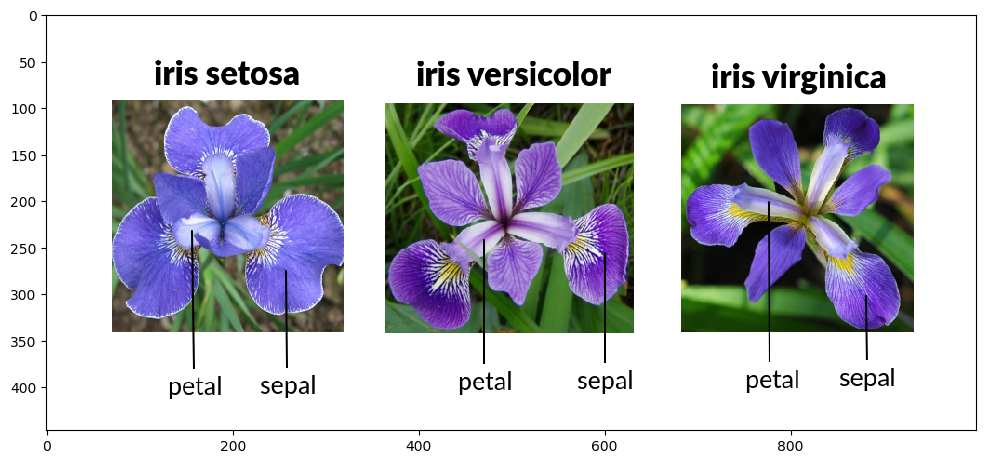

In [33]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img_rgb)

In [35]:
# howmany datapoints for each class
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### It is balanced dataset , each class have same number of data. Balance dataset is like if we have almost similar counts of each class, else Unbalanced dataset.

# 2-D scatter plot

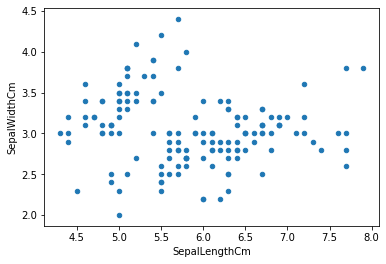

In [37]:
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

## This is not good , because each datasets have same color , we can't classify, we need coloring of different species
## Color based on class ie: hue="Species"

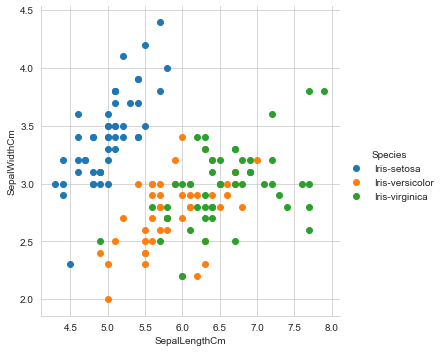

In [50]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

# Observation 
<ul>
    <li>Most of the blue points(Setosa) are clustered together, we can easily classify Setosa.</li>
    <li>If sepal width is in range [3cm,4.5cm]  and sepal length is in range [4cm ,5.8cm] its is more likely to be Setosa.</li>
    <li>We can not confidently classify Virginica and Versicolor with Plot.</li>
</ul>